# Convolutional Neural Network for MNIST digits clasisfication

## Dataset loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist


In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

## Model creation and training

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
# output layer for 10-class classification
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [10]:
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9095 - loss: 0.2972 - val_accuracy: 0.9817 - val_loss: 0.0595
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9865 - val_loss: 0.0392


## Model evaluation

In [11]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.956367,0.145490,0.9817,0.059529
1,0.984700,0.048966,0.9876,0.037450
2,0.990050,0.032062,0.9865,0.039173


<Axes: >

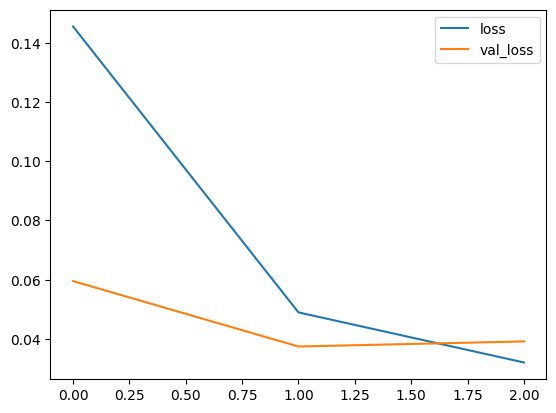

In [12]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

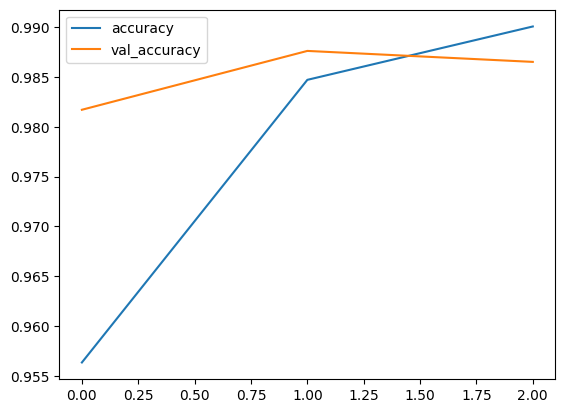

In [14]:
metrics[['accuracy', 'val_accuracy']].plot()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert y_test to one-hot encoded format if it's not already
if y_test.ndim == 1:
  # Assuming your labels are integers ranging from 0 to num_classes - 1
  num_classes = np.max(y_test) + 1
  y_test_encoded = np.zeros((y_test.shape[0], num_classes))
  y_test_encoded[np.arange(y_test.shape[0]), y_test] = 1
else:
  y_test_encoded = y_test

predictions = model.predict(x_test)
# Get the predicted class labels by finding the index of the maximum probability
predicted_labels = np.argmax(predictions, axis=1)

# Now use predicted_labels and original y_test (not encoded) in classification_report
print(classification_report(y_test, predicted_labels))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.96      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [29]:
confusion_matrix(y_test, predicted_labels)

array([[ 974,    0,    2,    0,    0,    1,    1,    1,    1,    0],
       [   0, 1130,    1,    0,    1,    0,    3,    0,    0,    0],
       [   0,    2, 1017,    0,    1,    0,    1,    4,    7,    0],
       [   0,    0,    3,  996,    0,    4,    0,    1,    3,    3],
       [   0,    0,    1,    0,  980,    0,    0,    0,    1,    0],
       [   1,    0,    0,    4,    0,  882,    3,    0,    2,    0],
       [   4,    1,    0,    0,    9,    4,  938,    0,    2,    0],
       [   0,    2,    5,    0,    4,    0,    0, 1011,    4,    2],
       [   2,    0,    0,    1,    0,    0,    0,    1,  966,    4],
       [   2,    2,    0,    1,   24,    4,    0,    2,    3,  971]])

<Axes: >

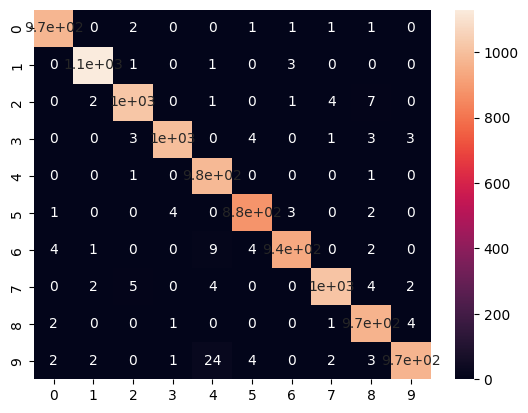

In [30]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predicted_labels), annot=True)

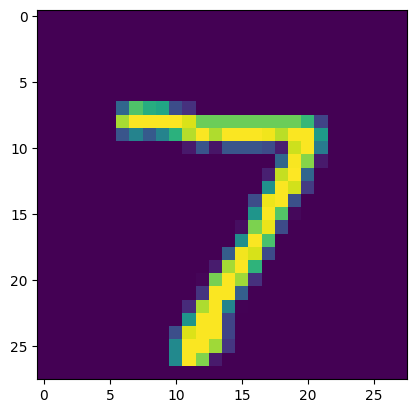

In [24]:
my_number = x_test[0]
plt.imshow(my_number.reshape(28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


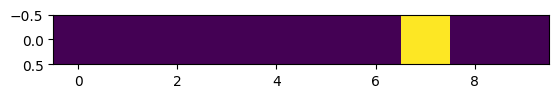

In [28]:
plt.imshow(model.predict(my_number.reshape(1,28,28,1)))